<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/Employee_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/content/Employee.csv')

In [7]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [8]:
df.shape

(4653, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [11]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [13]:
df['Age'].sum()

136767

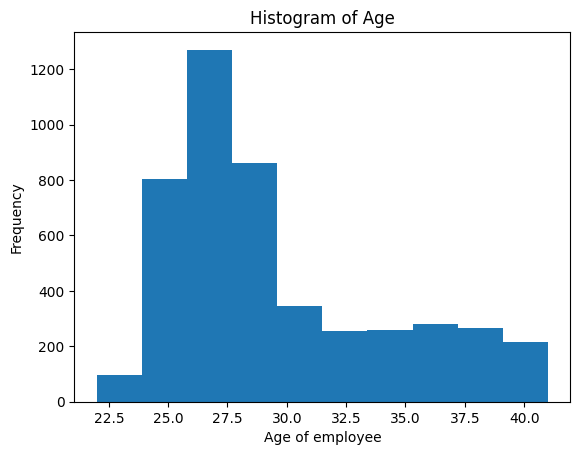

In [26]:
plt.hist(df['Age'])
plt.xlabel('Age of employee')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


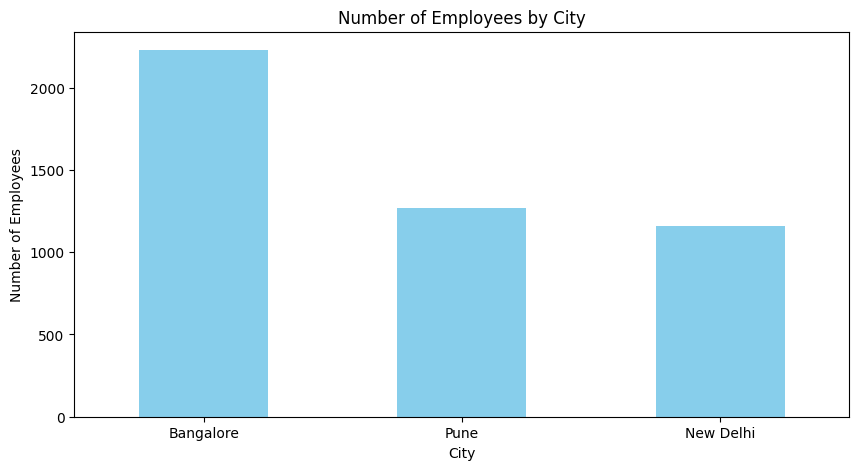

In [15]:
plt.figure(figsize=(10, 5))
city_counts = df['City'].value_counts()
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Employees by City')
plt.xlabel('City')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

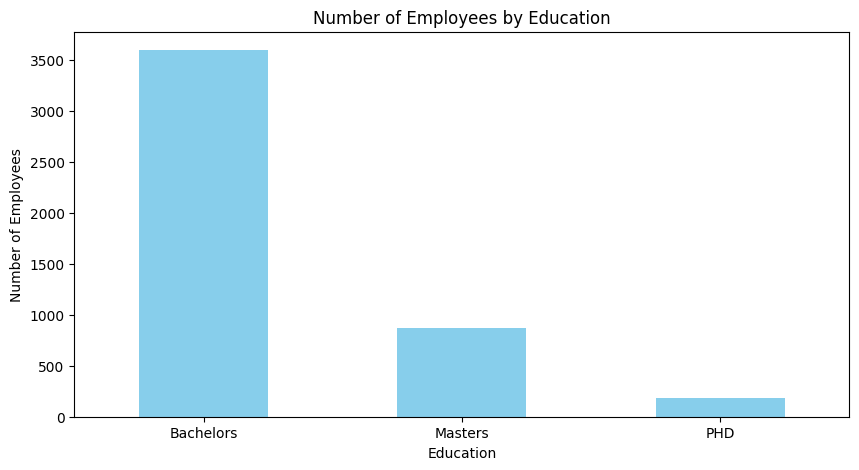

In [16]:
plt.figure(figsize=(10, 5))
city_counts = df['Education'].value_counts()
city_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Employees by Education')
plt.xlabel('Education')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

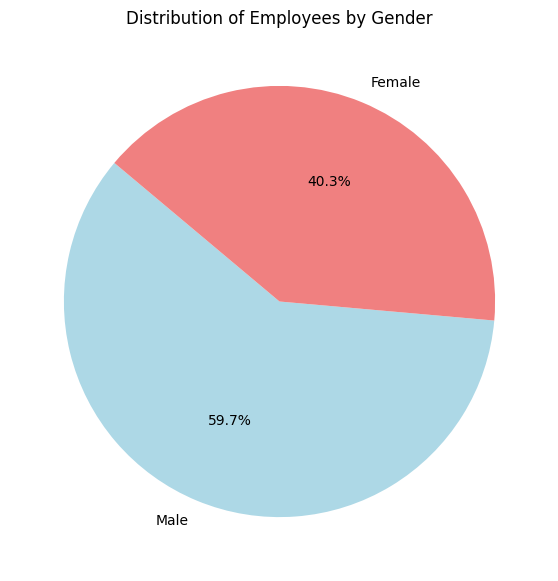

In [17]:
plt.figure(figsize=(7, 7))
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Employees by Gender')
plt.ylabel('')
plt.show()

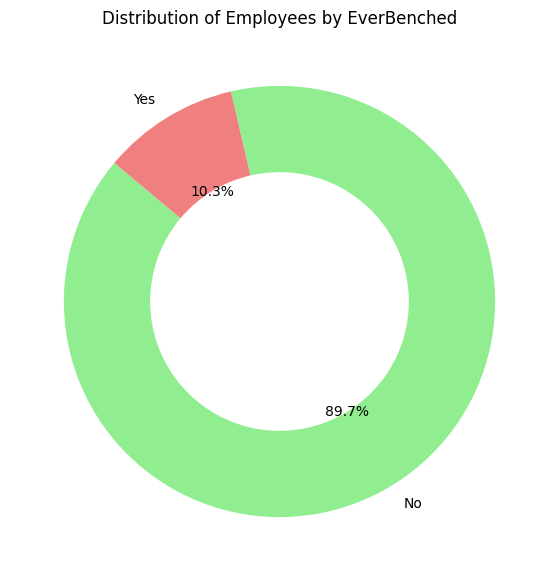

In [27]:
plt.figure(figsize=(7, 7))
benched_counts = df['EverBenched'].value_counts()
plt.pie(benched_counts, labels=benched_counts.index, autopct='%1.1f%%', startangle=140,
        colors=['lightgreen', 'lightcoral'], wedgeprops=dict(width=0.4))
plt.title('Distribution of Employees by EverBenched')
plt.ylabel('')
plt.show()

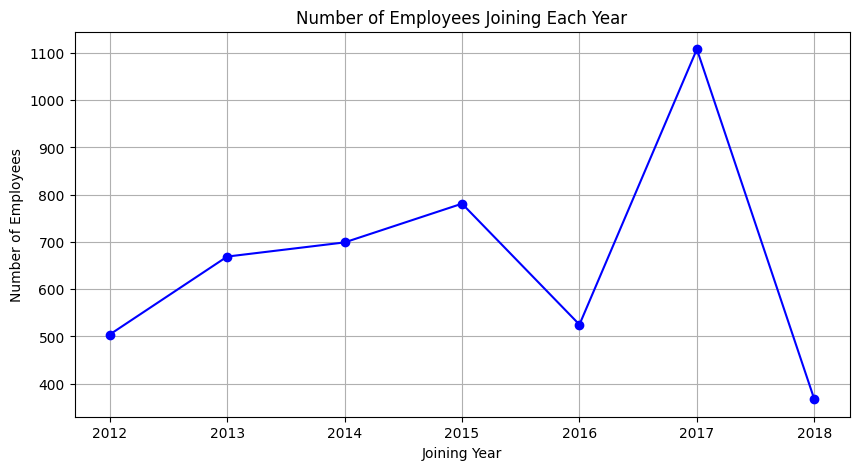

In [28]:
plt.figure(figsize=(10, 5))
joining_year_counts = df['JoiningYear'].value_counts().sort_index()
joining_year_counts.plot(kind='line', marker='o', color='blue')
plt.title('Number of Employees Joining Each Year')
plt.xlabel('Joining Year')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

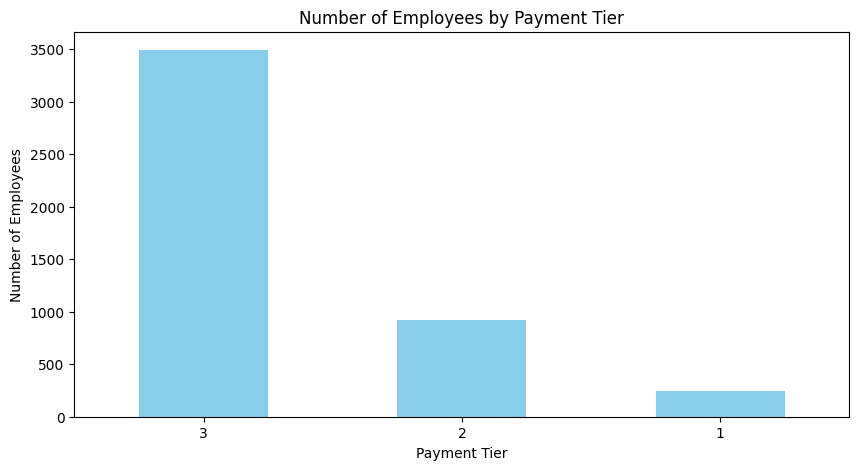

In [29]:
plt.figure(figsize=(10, 5))
payment_tier_counts = df['PaymentTier'].value_counts()
payment_tier_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Employees by Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()

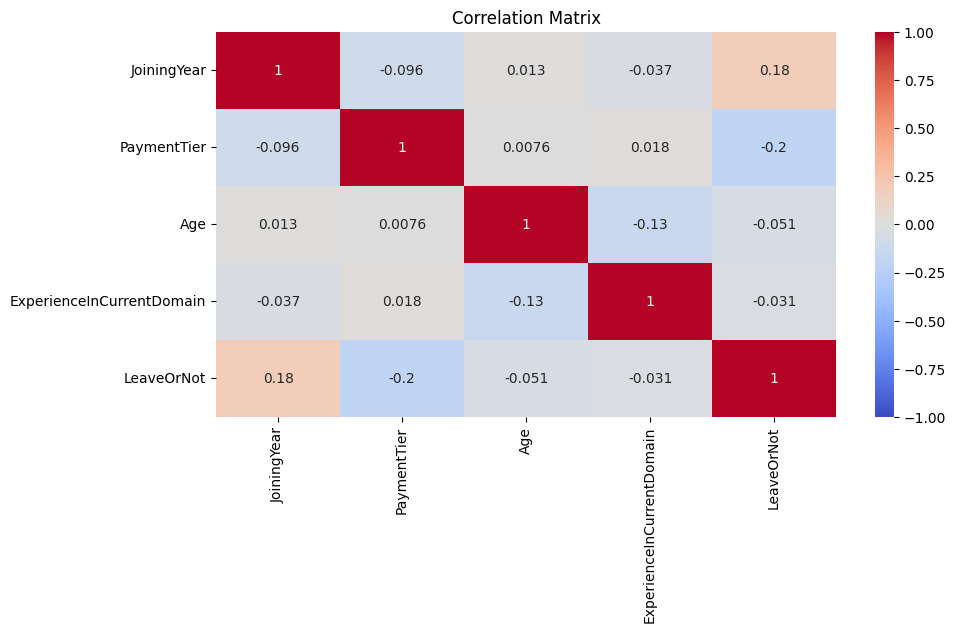

In [18]:
plt.figure(figsize=(10, 5))
corr_matrix = df[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

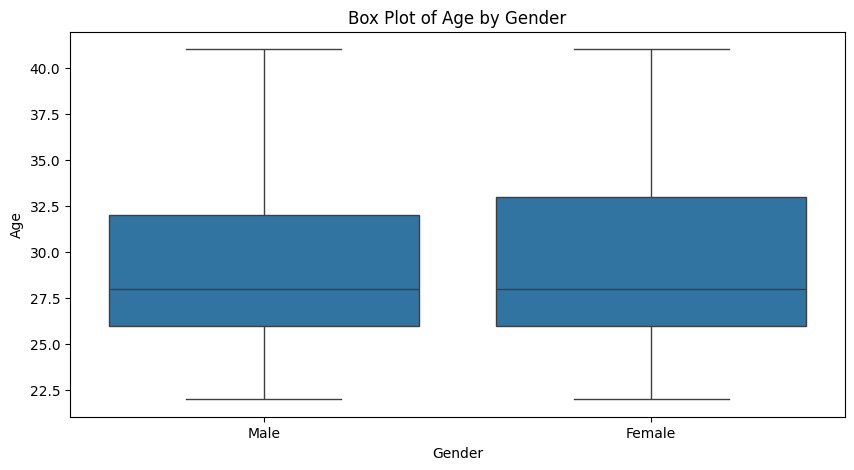

In [19]:
# prompt: give me box plot code

plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder instead of LabelEncoding
from sklearn.preprocessing import StandardScaler

In [21]:
X=df[['Age']]
y=df['ExperienceInCurrentDomain']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model= LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)
print(f'Predicted payment probability for employeee age:',y_pred)


Predicted payment probability for employeee age: [3.15030938 3.05972891 3.10501915 2.96914844 2.74269727 3.15030938
 3.01443868 3.10501915 2.96914844 3.01443868 3.01443868 3.15030938
 2.47095585 3.01443868 2.69740703 3.05972891 3.15030938 2.96914844
 3.01443868 2.42566562 2.96914844 3.10501915 2.74269727 3.01443868
 3.01443868 3.05972891 3.01443868 3.10501915 3.01443868 2.38037538
 3.10501915 2.47095585 2.96914844 3.10501915 2.42566562 2.47095585
 3.05972891 3.01443868 2.92385821 2.96914844 3.05972891 3.01443868
 3.01443868 3.10501915 3.01443868 3.10501915 2.51624609 3.15030938
 3.01443868 2.56153632 3.01443868 3.15030938 3.05972891 2.7879875
 2.83327774 2.87856797 3.01443868 2.96914844 3.05972891 3.10501915
 2.7879875  3.05972891 2.96914844 3.05972891 3.15030938 3.01443868
 3.10501915 2.83327774 2.60682656 3.15030938 2.47095585 2.6521168
 2.69740703 2.83327774 2.56153632 3.05972891 3.15030938 3.10501915
 3.05972891 2.92385821 2.87856797 3.01443868 2.60682656 2.92385821
 3.01443868 3.1

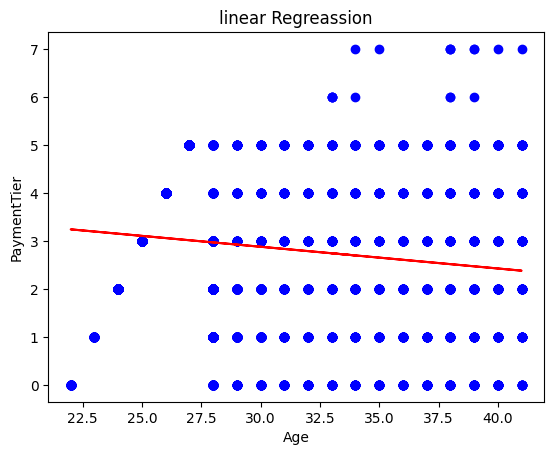

In [24]:
plt.scatter(X,y, color='blue')
plt.plot(X,model.predict(X),color='red')
plt.xlabel('Age')
plt.ylabel('PaymentTier')
plt.title('linear Regreassion')
plt.show()

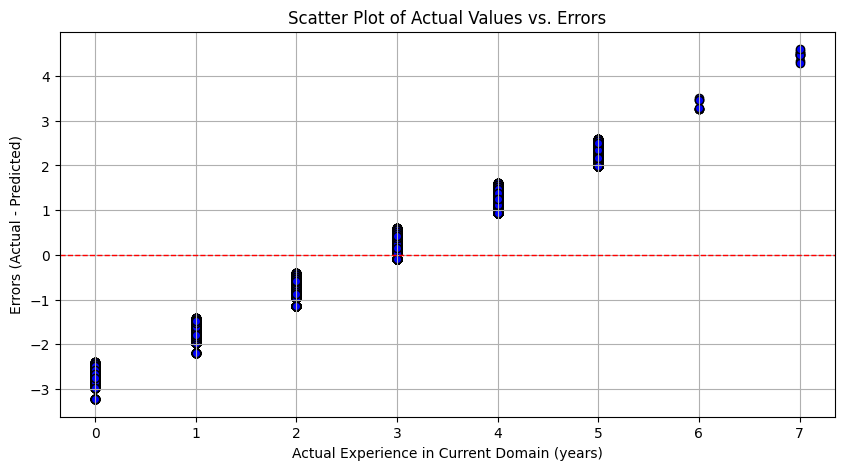

In [25]:
X = df[['Age']]  # Predictor
y = df['ExperienceInCurrentDomain']  # Response

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate the errors (residuals)
errors = y - predictions

# Plot the actual values versus the errors
plt.figure(figsize=(10, 5))
plt.scatter(y, errors, color='blue', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title('Scatter Plot of Actual Values vs. Errors')
plt.xlabel('Actual Experience in Current Domain (years)')
plt.ylabel('Errors (Actual - Predicted)')
plt.grid(True)
plt.show()